Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



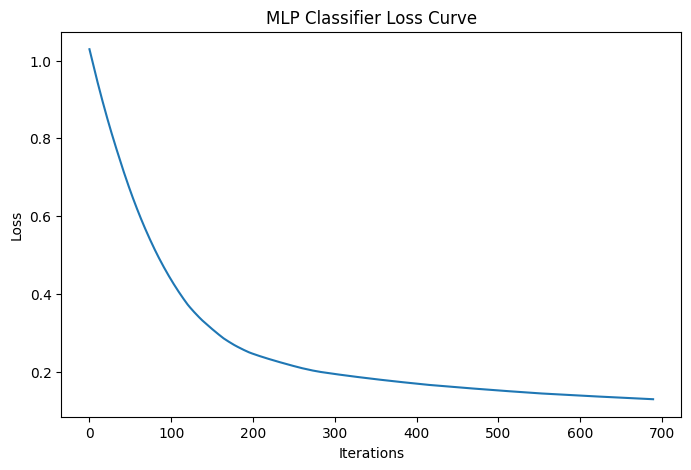

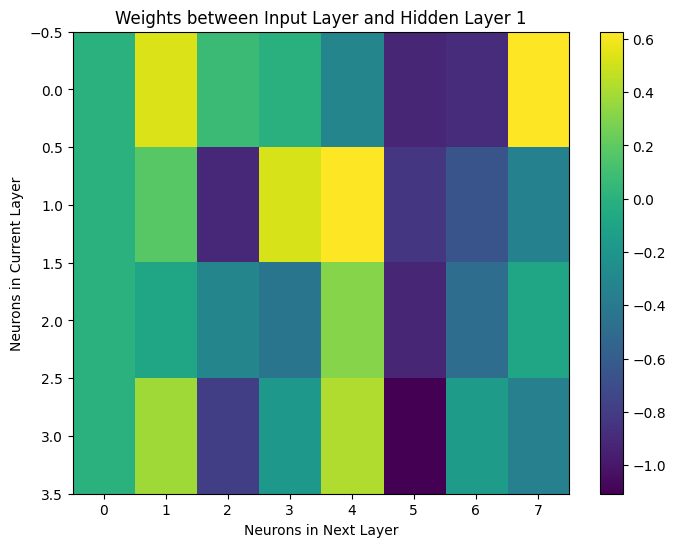

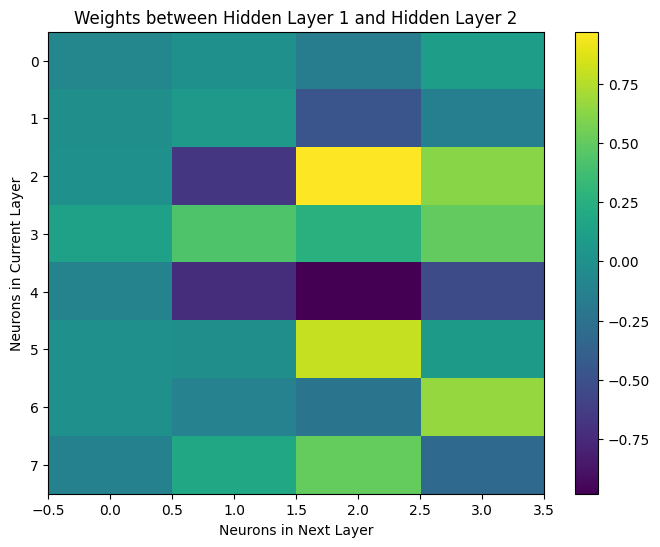

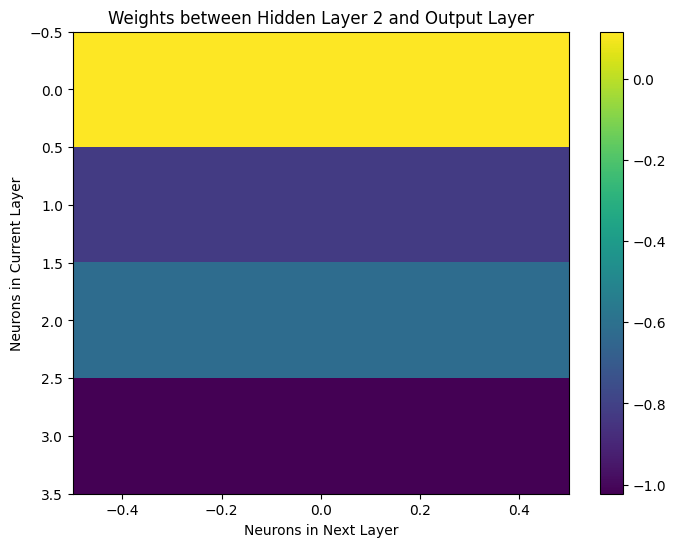

In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
# Step 2: Dataset
data = {
   "StudyHours": [1, 2, 3, 4, 5, 6, 7, 2, 4, 6, 8, 3],
   "Attendance": [60, 65, 70, 75, 80, 85, 90, 68, 78, 88, 92, 72],
   "PrevScore": [45, 50, 55, 60, 65, 70, 75, 52, 63, 73, 85, 58],
   "Coaching": [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
   "Pass": [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0]
}
df = pd.DataFrame(data)
# Step 3: Split
X = df.drop("Pass", axis=1)
y = df["Pass"]
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42
)
# Step 4: Scaling (MANDATORY)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Step 5: Build MLPClassifier
mlp = MLPClassifier(
   hidden_layer_sizes=(8, 4),
   activation='relu',
   solver='adam',
   max_iter=1000,
   random_state=42
)
# Step 6: Train
mlp.fit(X_train, y_train)
# Step 7: Predict
y_pred = mlp.predict(X_test)
# Step 8: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_)
plt.title("MLP Classifier Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()
# Step 9: Visualize Weights
layer_names = ["Input Layer"] + [f"Hidden Layer {i+1}" for i in range(len(mlp.hidden_layer_sizes))] + ["Output Layer"]
for i in range(len(mlp.coefs_)):
   plt.figure(figsize=(8, 6))
   plt.imshow(mlp.coefs_[i], cmap='viridis', aspect='auto')
   plt.colorbar()
   plt.title(f"Weights between {layer_names[i]} and {layer_names[i+1]}")
   plt.xlabel("Neurons in Next Layer")
   plt.ylabel("Neurons in Current Layer")
   plt.show()